In [1]:
import torch
from torchgeo.datasets import Potsdam

root = "/mnt/e/data/potsdam/"
ds = Potsdam(root)


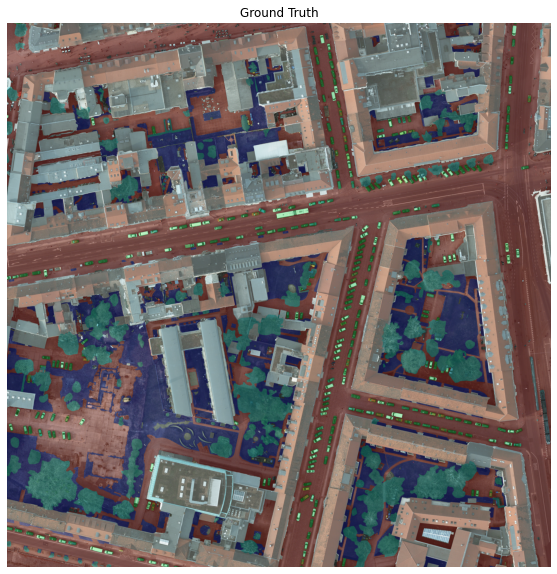

In [9]:
sample = ds[14]
fig = ds.plot(sample, alpha=0.2)